# How to Handle Time & Date Pandas

In [5]:
# Import Library
import pandas as pd
pd.__version__

u'0.20.3'

In [36]:
# Load the DataSet
#ufo = pd.read_csv('http://bit.ly/uforeports')
data = {'date': ['2009-05-01 18:47:05.069722', '2010-05-01 18:47:05.119994', '2011-05-02 18:47:05.178768', '2012-05-02 18:47:05.230071', '2013-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2015-05-03 18:47:05.332662', '2016-05-03 18:47:05.385109', '2017-05-04 18:47:05.436523', '2018-05-04 18:47:05.486877'], 
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])

In [37]:
df.head()

,date,battle_deaths
0,2009-05-01 18:47:05.069722,34
1,2010-05-01 18:47:05.119994,25
2,2011-05-02 18:47:05.178768,26
3,2012-05-02 18:47:05.230071,15
4,2013-05-02 18:47:05.230071,15


In [38]:
df.dtypes
# date is the object data type

date             object
battle_deaths     int64
dtype: object

In [39]:
# Extract the Time with String sclicing(-15 from back at what position slice starts and -13 upto this position)
df.date.str.slice(-15, -13 ).astype(int).head()
# This approach will not work and break

0    18
1    18
2    18
3    18
4    18
Name: date, dtype: int64

In [40]:
# Lets Use the better methodology
# How - Convert the date column into pandas datetime format
# Note We don't specify the pandas the format of the time
df['Date'] = pd.to_datetime(df.date)

In [41]:
df.dtypes

date                     object
battle_deaths             int64
Date             datetime64[ns]
dtype: object

In [42]:
df.drop('date',axis = 1 ,inplace = True)

In [43]:
df.head()

,battle_deaths,Date
0,34,2009-05-01 18:47:05.069722
1,25,2010-05-01 18:47:05.119994
2,26,2011-05-02 18:47:05.178768
3,15,2012-05-02 18:47:05.230071
4,15,2013-05-02 18:47:05.230071


In [44]:
# Benifites from the Date and time function
# Show only the Hour
df.Date.dt.hour

0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: Date, dtype: int64

In [45]:
df['Date'].dt.weekday_name

0       Friday
1     Saturday
2       Monday
3    Wednesday
4     Thursday
5       Friday
6       Sunday
7      Tuesday
8     Thursday
9       Friday
Name: Date, dtype: object

In [46]:
pd.__version__

u'0.20.3'

In [47]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit: None
python: 2.7.12.final.0
python-bits: 64
OS: Linux
OS-release: 4.4.0-97-generic
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: en_IN
LOCALE: None.None

pandas: 0.20.3
pytest: 2.8.7
pip: 9.0.1
setuptools: 20.7.0
Cython: None
numpy: 1.13.3
scipy: 0.17.0
xarray: None
IPython: 5.4.1
sphinx: 1.3.6
patsy: 0.4.1
dateutil: 2.6.1
pytz: 2017.2
blosc: None
bottleneck: None
tables: 3.2.2
numexpr: 2.6.4
feather: None
matplotlib: 1.5.1
openpyxl: 2.3.0
xlrd: 0.9.4
xlwt: 0.7.5
xlsxwriter: None
lxml: 3.5.0
bs4: None
html5lib: 0.999999999
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.8
s3fs: None
pandas_gbq: None
pandas_datareader: None


In [48]:
# Upgarde the pandas
# sudo pip install --upgrade pandas

In [49]:
pd.__version__

u'0.20.3'

In [50]:
# Work on different format and save ts and will use for comparison 
ts = pd.to_datetime('1/1/1989')

In [51]:
# : - show all rows which satisfy the condition
df.loc[df.Date >= ts, :]

,battle_deaths,Date
0,34,2009-05-01 18:47:05.069722
1,25,2010-05-01 18:47:05.119994
2,26,2011-05-02 18:47:05.178768
3,15,2012-05-02 18:47:05.230071
4,15,2013-05-02 18:47:05.230071
5,14,2014-05-02 18:47:05.280592
6,26,2015-05-03 18:47:05.332662
7,25,2016-05-03 18:47:05.385109
8,62,2017-05-04 18:47:05.436523
9,41,2018-05-04 18:47:05.486877


In [52]:
# Do some mathematical operation
df.Date.max() # Latest Time 

Timestamp('2018-05-04 18:47:05.486877')

In [53]:
(df.Date.max() - df.Date.min()).days

3290

In [54]:
# Ploting of Deaths by Date
# To plot we need to 
%matplotlib inline

In [55]:
# Create the year column
df["Year"] = df.Date.dt.year

In [56]:
df.head()

,battle_deaths,Date,Year
0,34,2009-05-01 18:47:05.069722,2009
1,25,2010-05-01 18:47:05.119994,2010
2,26,2011-05-02 18:47:05.178768,2011
3,15,2012-05-02 18:47:05.230071,2012
4,15,2013-05-02 18:47:05.230071,2013


In [60]:
# How many Year and sort by index
df.Year.value_counts().sort_index()

2009    1
2010    1
2011    1
2012    1
2013    1
2014    1
2015    1
2016    1
2017    1
2018    1
Name: Year, dtype: int64

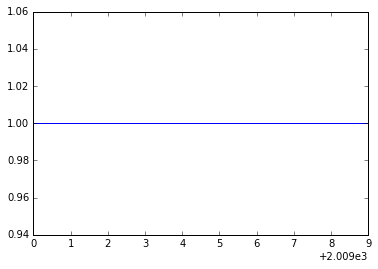

In [61]:
df.Year.value_counts().sort_index().plot()